<a href="https://colab.research.google.com/github/annisapraditha/cbir_tkc/blob/main/bismillah_cbir_tkc_(007_%26_027)1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/TKC/Skinlee.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/TKC/Dataset')
zip_ref.close()

In [2]:
%cd /content/drive/MyDrive/TKC/Dataset/Skinlee

/content/drive/MyDrive/TKC/Dataset/Skinlee


In [3]:
%ls 

Datasetnew/  lesion/  skin/


In [4]:
train_dir = 'train'
test_dir = 'test'

In [38]:
pip install split-folders

In [41]:
import splitfolders  

splitfolders.ratio('/content/drive/MyDrive/TKC/Dataset/Skinlee', output="Datasetnew", seed=42, ratio=(.80, .20), group_prefix=None)

Copying files: 1182 files [02:06,  9.31 files/s]


In [5]:
import os
base_dir = '/content/drive/MyDrive/TKC/Dataset/Skinlee/Datasetnew'

In [6]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [7]:
train_lesion = os.path.join(train_dir, 'lesion')
train_skin = os.path.join(train_dir, 'skin')

test_lesion = os.path.join(test_dir, 'lesion')
test_skin = os.path.join(test_dir, 'skin')

In [8]:
print('total training lesion images:', len(os.listdir(train_lesion)))
print('total training skin images:', len(os.listdir(train_skin)))

print('total test lesion images:', len(os.listdir(test_lesion)))
print('total test skin images:', len(os.listdir(test_skin)))

total training lesion images: 397
total training skin images: 548
total test lesion images: 100
total test skin images: 137


In [9]:
import os
import cv2
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
import os
import cv2

base_dir = '/content/drive/MyDrive/TKC/Dataset/Skinlee/Datasetnew/train'

les_dir = os.path.join(base_dir, 'lesion')
skin_dir = os.path.join(base_dir, 'skin')

les_img_dir = list()
skin_img_dir = list()

for dirpath, dirnames, filenames in os.walk(les_dir):
    for file in filenames:
        if ".jpg" in file:
            image_path = os.path.join(dirpath, file)
            les_img_dir.append(image_path)

for dirpath, dirnames, filenames in os.walk(skin_dir):
    for file in filenames:
        if ".jpg" in file:
            image_path = os.path.join(dirpath, file)
            skin_img_dir.append(image_path)

In [11]:
from random import shuffle

target_dir = '/content/drive/MyDrive/TKC/dataset_resize'

shuffle(les_img_dir)
shuffle(skin_img_dir)

for i, img_path in enumerate(les_img_dir):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (224,224))

    file_name = f"lesion-{i + 1}.jpg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

for i, img_path in enumerate(skin_img_dir):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (224,224))

    file_name = f"skin-{i + 1}.jpg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

In [12]:
import cv2
import numpy as np
import os

test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, ((224,224)))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [13]:
import cv2
import numpy as np
import os

train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, ((224,224)))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [14]:
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (945, 224, 224, 3)
Train Label =  (945,)
Test Data =  (237, 224, 224, 3)
Test Label =  (237,)


In [15]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", test_data[0][0][0])

x_test = test_data.astype('float32') / 255.0
x_train = train_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data sebelum di-normalisasi  [25 39 47]
Data setelah di-normalisasi  [0.09803922 0.15294118 0.18431373]


In [16]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", test_label[100:110])

lb = LabelEncoder()
y_test = lb.fit_transform(test_label)
y_train = lb.fit_transform(train_label)

print("Label setelah di-encoder ", y_test[100:110])

Label sebelum di-encoder  ['skin' 'skin' 'skin' 'skin' 'skin' 'skin' 'skin' 'skin' 'skin' 'skin']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./225,
    validation_split=0.2,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    color_mode='rgb',
    shuffle=True
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    color_mode='rgb',
    shuffle=True
)

Found 757 images belonging to 2 classes.
Found 237 images belonging to 2 classes.
Found 188 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications import MobileNet

In [21]:
import tensorflow as tf
from keras import layers, Model
from keras.layers import InputLayer, Activation, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, Concatenate, Input, GlobalAveragePooling2D
from keras.models import Sequential

model_1 = MobileNet (weights='imagenet', include_top=False, input_shape=(224,224,3))

17235968/17225924 [==============================] - 0s 0us/step


In [22]:
class Combin1:
  def build(model_1,classes):
    headModel = model_1.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(128, activation='relu')(headModel)
    headModel = Dense(64, activation='relu')(headModel)
    headModel = Dense(32, activation='relu')(headModel)
    headModel = Dense(1, activation='relu')(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(classes, activation='sigmoid')(headModel)
    return headModel

In [23]:
headModel2 = Combin1.build(model_1, 1)
model2 =Model(inputs=model_1.input, outputs=headModel2)

In [24]:
for layer in model_1.layers:
  layer.trainable = False

In [25]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [26]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import Precision, Recall
model2.compile(
    optimizer=Adam(lr=0.0001, decay= 0.001/20),
    loss ='binary_crossentropy',
    metrics =['accuracy',
              tf.keras.metrics.Precision(name='precision'),
              tf.keras.metrics.Recall(name='recall')]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
test=model2.fit(
    train_generator,
     validation_data = val_generator,
     epochs=100,
     steps_per_epoch= 8,
     batch_size=15,

)

Epoch 1/100
8/8 [==============================] - 112s 15s/step - loss: 0.6823 - accuracy: 0.5195 - precision: 0.5316 - recall: 0.9130 - val_loss: 0.6521 - val_accuracy: 0.5798 - val_precision: 0.5798 - val_recall: 1.0000
Epoch 2/100
8/8 [==============================] - 95s 13s/step - loss: 0.6439 - accuracy: 0.5312 - precision: 0.5312 - recall: 1.0000 - val_loss: 0.6371 - val_accuracy: 0.5798 - val_precision: 0.5798 - val_recall: 1.0000
Epoch 3/100
8/8 [==============================] - 95s 13s/step - loss: 0.6185 - accuracy: 0.6163 - precision: 0.6667 - recall: 0.6761 - val_loss: 0.6440 - val_accuracy: 0.5851 - val_precision: 0.5829 - val_recall: 1.0000
Epoch 4/100
8/8 [==============================] - 97s 13s/step - loss: 0.5903 - accuracy: 0.6797 - precision: 0.7980 - recall: 0.5603 - val_loss: 0.6341 - val_accuracy: 0.6223 - val_precision: 0.6056 - val_recall: 1.0000
Epoch 5/100
8/8 [==============================] - 96s 13s/step - loss: 0.6227 - accuracy: 0.6367 - precision: 

In [28]:
from keras.models import save_model
model2.save('skinlee_model.h5')

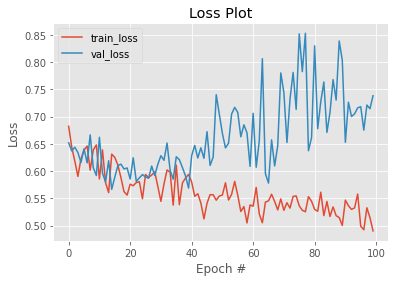

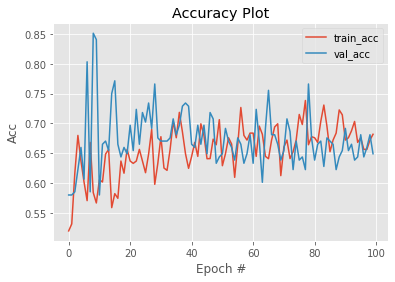

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), test.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), test.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), test.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), test.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

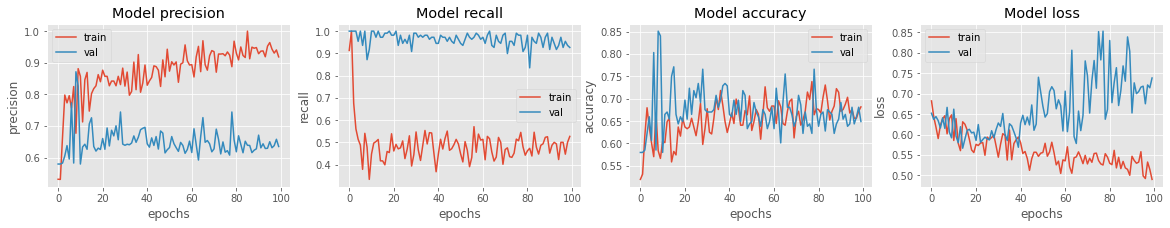

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(test.history[met])
    ax[i].plot(test.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [35]:
from keras.models import load_model
class FeatureExtractor:
    def __init__(self, model):
        self.model = model2
    
    def extract(self, img):
        img = img.resize((224, 224))
        img = img.convert('RGB')


        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        feature = self.model.predict(x)[0]
        
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor(load_model('/content/drive/MyDrive/TKC/Dataset/Skinlee/skinlee_model.h5', compile=False))

In [36]:
from pathlib import Path
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

base_dir = '/content/drive/MyDrive/TKC/dataset_resize'
feature_dir = '/content/drive/MyDrive/TKC/dataset_resize/feature_extract'

img_paths = list()
features = list()

for img_path in sorted(Path(base_dir).glob("*.jpg")):
    img_paths.append(img_path)
    feature = fe.extract(img=Image.open(img_path))
    features.append(feature)

features = np.array(features)
np.save(feature_dir + '/extracted_feature2.npy', features)

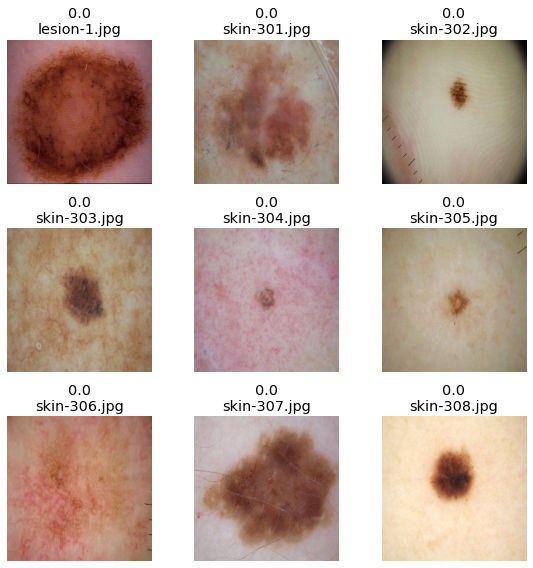

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import os

query_image = img_paths[224]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()

In [34]:
loss, acc, prec, rec = model2.evaluate(val_generator)
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

6/6 [==============================] - 66s 11s/step - loss: 0.7214 - accuracy: 0.6489 - precision: 0.6352 - recall: 0.9266
Accuracy = 64.89 %
Precision = 63.52 %
Recall = 92.66 %
